In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

%matplotlib inline

In [2]:
df = pd.read_csv('datasets/kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
X = df[df.columns[1:]]
y = df[df.columns[0]]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Decision Tree

In [5]:
d_tree = DecisionTreeClassifier()

In [6]:
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
y_pred = d_tree.predict(X_test)

In [8]:
print(metrics.classification_report(y_test, y_pred))
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.68      0.76      0.72        17
     present       0.33      0.25      0.29         8

   micro avg       0.60      0.60      0.60        25
   macro avg       0.51      0.51      0.50        25
weighted avg       0.57      0.60      0.58        25

Accuracy:  0.6


### Random Forest

In [9]:
r_forest= RandomForestClassifier(n_estimators=10)

In [10]:
r_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [11]:
y_pred = r_forest.predict(X_test)

In [12]:
print(metrics.classification_report(y_test, y_pred))
print('Accuracy: %.2f%%.' % metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.71      1.00      0.83        17
     present       1.00      0.12      0.22         8

   micro avg       0.72      0.72      0.72        25
   macro avg       0.85      0.56      0.53        25
weighted avg       0.80      0.72      0.64        25

Accuracy: 0.72%.


### Decision Tree Visualization

* You need to install **pydot**.

In [13]:
import pydot

from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

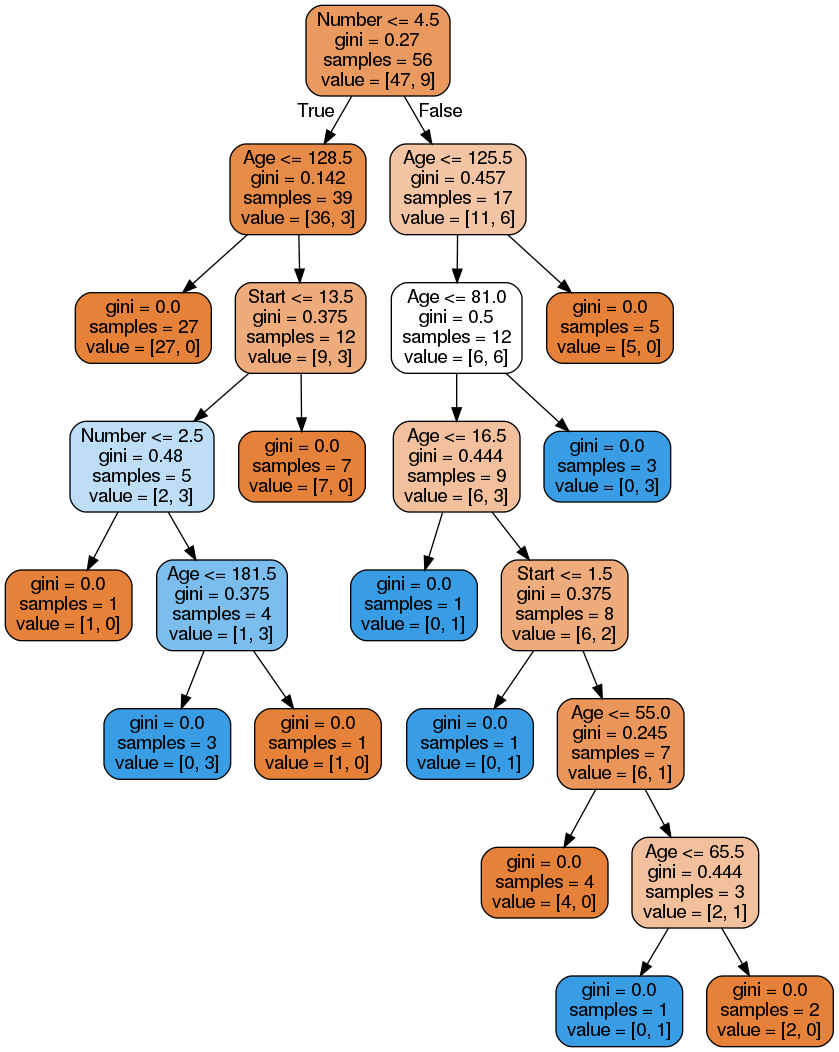

In [14]:
features = list(df.columns[1:])
dot_data = StringIO()

export_graphviz(d_tree, out_file=dot_data, feature_names=features, 
                filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png(), width=700)